In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

url = 'https://raw.githubusercontent.com/Auslum/scikit_learn_survey/refs/heads/main/scikit-learn-survey-master-dataset.csv'

df = pd.read_csv(url)

#print(df.head())

# Question #2
---



In [ ]:
# Scikit-learn logo colors (blue and orange)
scikit_learn_colors = ["#0072B2", "#FF9900"]

# Generate a color interpolation for the priority levels
priority_colors = [
    mcolors.to_hex(c)
    for c in mcolors.LinearSegmentedColormap.from_list("ScikitLearn", scikit_learn_colors)(np.linspace(0, 1, len(priority_levels)))
]

# Filter the columns related to the question
priority_columns = [col for col in df.columns if "PROJECT FUTURE DIRECTION AND PRIORITIES" in col]
priority_data = df[priority_columns].dropna()

# Rename the categories
renamed_columns = [
    "Performance", "Reliability", "Packaging", "New features",
    "Technical documentation", "Educational materials",
    "Website redesign", "Other"
]
priority_data.columns = renamed_columns

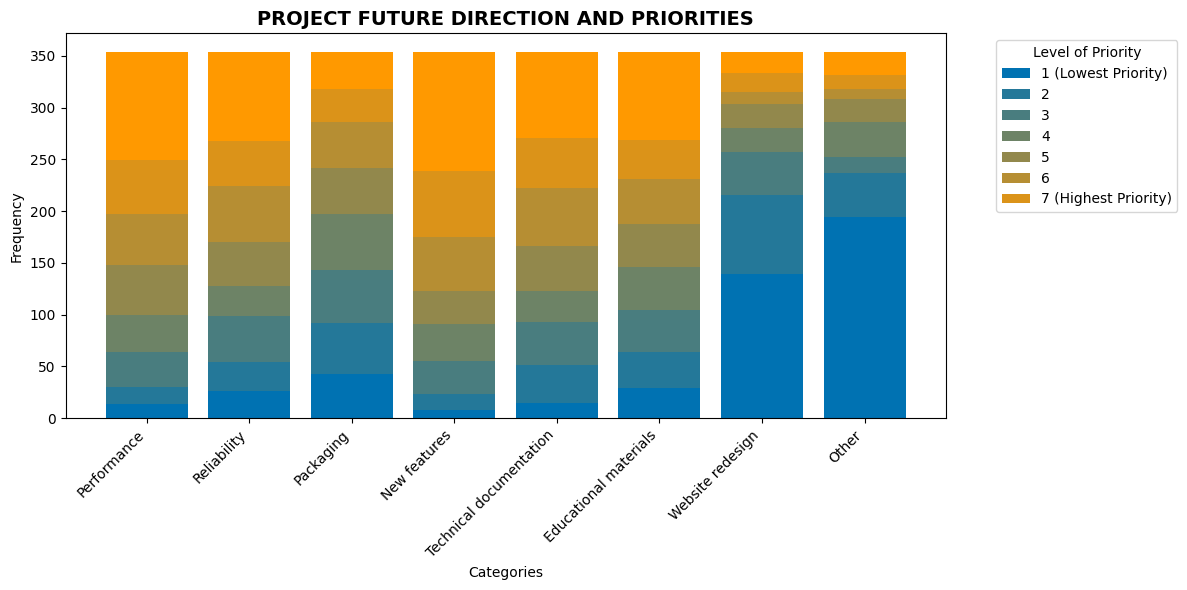

In [ ]:
# Prepare data for a stacked bar chart
stacked_bar_data = pd.DataFrame({
    category: priority_data[category].value_counts().sort_index()
    for category in renamed_columns
}).fillna(0).astype(int).T

priority_levels = [int(level) for level in stacked_bar_data.columns]
categories = stacked_bar_data.index

# Create the stacked bar chart
plt.figure(figsize=(12, 6))
bottoms = np.zeros(len(categories))

for level, color in zip(priority_levels, priority_colors):
    plt.bar(categories, stacked_bar_data[level], bottom=bottoms, label=f'Priority {level}', color=color)
    bottoms += stacked_bar_data[level]

# Customize the chart
plt.title("PROJECT FUTURE DIRECTION AND PRIORITIES", fontsize=14, fontweight='bold')
plt.xlabel("Categories")
plt.ylabel("Frequency")
plt.xticks(rotation=45, ha='right')

# Customize the legend with explanations
priority_labels = [
    "1 (Lowest Priority)", "2", "3", "4", "5", "6", "7 (Highest Priority)"
]
plt.legend(
    labels=priority_labels,
    title="Level of Priority", bbox_to_anchor=(1.05, 1), loc="upper left", fontsize=10
)

# Adjust and display the chart
plt.tight_layout()
plt.show()

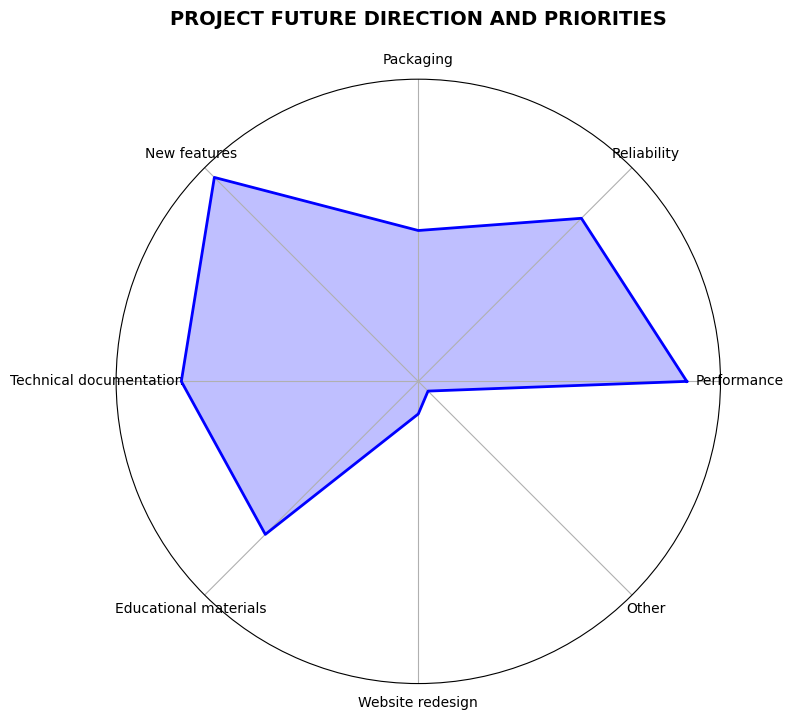

In [ ]:
# Spider chart
# Prepare data for calculation of weighted averages
stacked_bar_data = pd.DataFrame({
    category: priority_data[category].value_counts().sort_index()
    for category in renamed_columns
}).fillna(0).astype(int).T

# Calculate weighted averages for each category
priority_levels = np.array([1, 2, 3, 4, 5, 6, 7, 8])
weighted_scores = (stacked_bar_data * priority_levels).sum(axis=1) / stacked_bar_data.sum(axis=1)

# Verify new data
# print("Weighted averages per category:\n", weighted_scores)

# Prepare the spider chart
labels = weighted_scores.index
values = weighted_scores.values
num_vars = len(labels)

# Ensure that the graph is closed (the first value is repeated at the end)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
values = np.concatenate((values, [values[0]]))
angles += angles[:1]

# Create the spider chart
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
ax.fill(angles, values, color='blue', alpha=0.25)
ax.plot(angles, values, color='blue', linewidth=2)

# Adjust the tags
ax.set_yticks([])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels, fontsize=10)
ax.set_title("PROJECT FUTURE DIRECTION AND PRIORITIES", fontsize=14, fontweight='bold', pad=20)

# Show the chart
plt.tight_layout()
plt.show()

# Question #5

---



In [ ]:
# Scikit-learn logo colors (blue and orange)
scikit_learn_colors = ["#0072B2", "#FF9900"]

# Generate a color interpolation for the priority levels
priority_colors = [
    mcolors.to_hex(c)
    for c in mcolors.LinearSegmentedColormap.from_list("ScikitLearn", scikit_learn_colors)(np.linspace(0, 1, len(priority_levels)))
]

# Identify the columns related to the question about priorities for ML tasks
ml_task_columns = [
    col for col in df.columns
    if "Please order the following ML tasks in order of priority to you" in col
]

# Filter relevant data
ml_task_data = df[ml_task_columns].dropna()

# Rename columns
renamed_ml_task_columns = [
    "Regression", "Classification", "Forecasting",
    "Outlier/anomaly detection", "Dimensionality reduction",
    "Clustering", "Other"
]
ml_task_data.columns = renamed_ml_task_columns

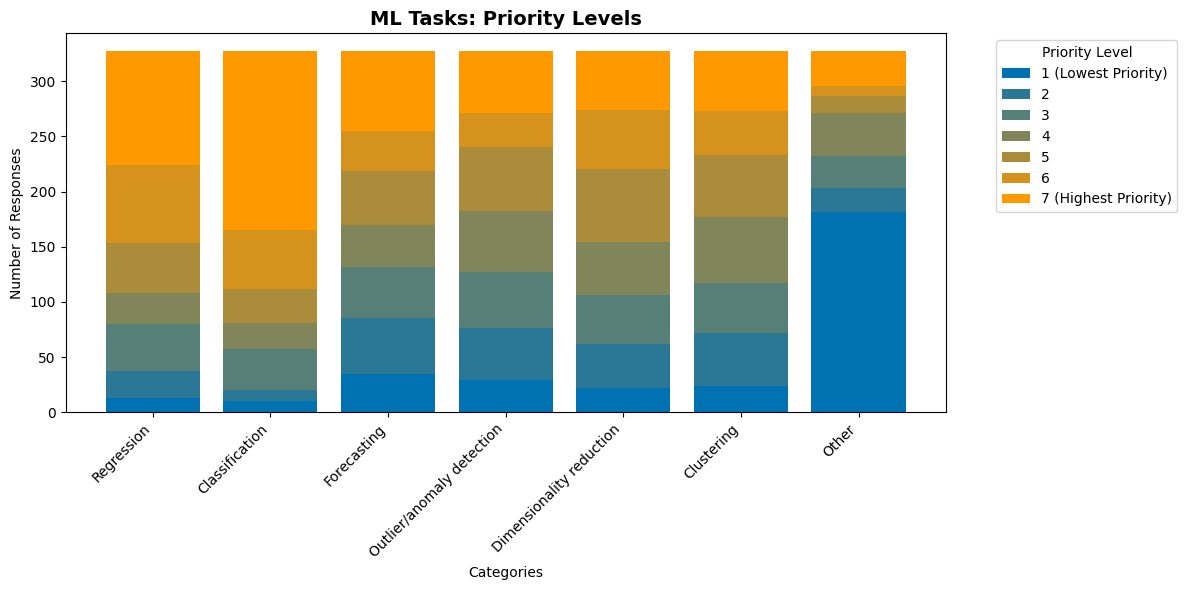

In [ ]:
# Stacked bar chart
# Reindex with available priority levels (1 to 7)
priority_levels = [1, 2, 3, 4, 5, 6, 7]

# Prepare data for the stacked bar chart
stacked_bar_data = pd.DataFrame({
    category: ml_task_data[category].value_counts().reindex(priority_levels, fill_value=0)
    for category in ml_task_data.columns
}).T

# Create the stacked bar chart
plt.figure(figsize=(12, 6))
bottoms = np.zeros(len(stacked_bar_data))

# Loop through priority levels and apply custom colors
for level, color in zip(priority_levels, priority_colors):
    plt.bar(stacked_bar_data.index, stacked_bar_data[level], bottom=bottoms, label=f'Priority {level}', color=color)
    bottoms += stacked_bar_data[level]

# Customize the chart
plt.title("ML Tasks: Priority Levels", fontsize=14, fontweight='bold')
plt.xlabel("Categories")
plt.ylabel("Number of Responses")

priority_labels = [
    "1 (Lowest Priority)", "2", "3", "4", "5", "6", "7 (Highest Priority)"
]
plt.legend(
    labels=priority_labels,
    title="Priority Level", bbox_to_anchor=(1.05, 1), loc="upper left", fontsize=10
)

# Rotate category labels and adjust layout
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

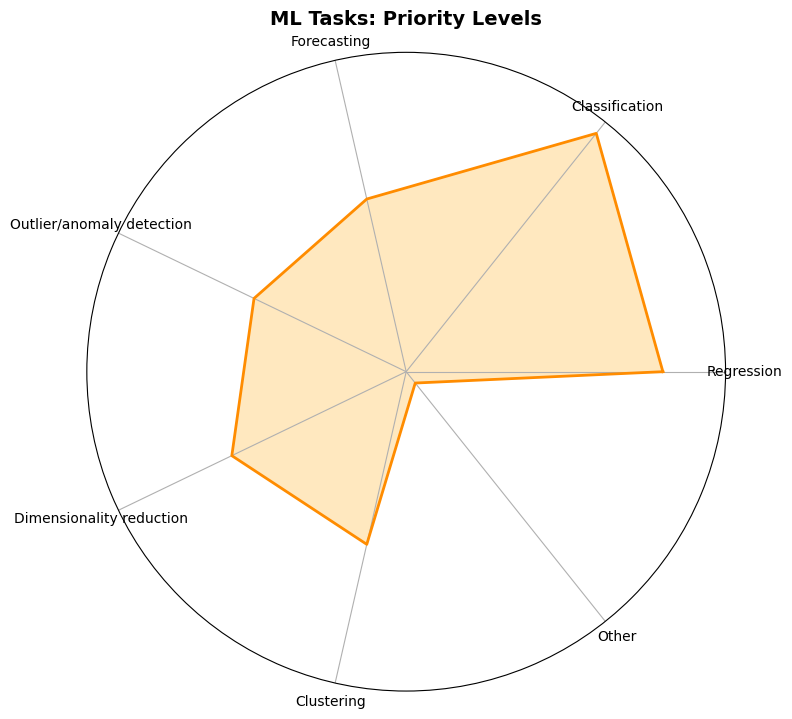

In [ ]:
# Spider chart

# Count the responses of each priority level for each category
priority_levels = np.array([1, 2, 3, 4, 5, 6, 7])
stacked_bar_data = pd.DataFrame({
    category: ml_task_data[category].value_counts().sort_index()
    for category in renamed_ml_task_columns
}).fillna(0).astype(int).T

# Calculate weighted averages for each category
weighted_scores = (stacked_bar_data * priority_levels).sum(axis=1) / stacked_bar_data.sum(axis=1)

# Verify weighted averages
#print("Weighted averages per category:\n", weighted_scores)

# Prepare data for the spider chart
labels = weighted_scores.index
values = weighted_scores.values
num_vars = len(labels)

# Make sure the chart closes (first value repeats at the end)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
values = np.concatenate((values, [values[0]]))
angles += angles[:1]

# Create the spider chart
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
ax.fill(angles, values, color='orange', alpha=0.25)
ax.plot(angles, values, color='darkorange', linewidth=2)

# Adjust the tags and the title
ax.set_yticks([])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels, fontsize=10)
ax.set_title("ML Tasks: Priority Levels", fontsize=14, fontweight='bold', pad=20)

# Show the chart
plt.tight_layout()
plt.show()

# Question #6

---



In [ ]:
def plot_response_counts2(df, column_name, mapping_dict, title, color, y_ax_name):
    """
    General function to plot response counts for survey questions with multiple answers.

    Parameters:
    df (DataFrame): The survey data.
    column_name (str): The column name containing the responses.
    mapping_dict (dict): Dictionary mapping responses in various languages to English categories.
    title (str): The title for the graph.
    color (str): The color of the bars.
    y_ax_name (str): Label for the y-axis.
    """
    # Function to normalize responses using the mapping dictionary
    def normalize_responses(response):
        if isinstance(response, str):
            # Split the responses by comma, strip extra spaces, and map to English categories
            response_split = [r.strip() for r in response.split(',')]
            normalized = [mapping_dict.get(r, None) for r in response_split]
            # Filter out None values (unmapped responses)
            return [r for r in normalized if r is not None]
        return []

    # Apply the normalization to the responses
    df['Normalized_Responses'] = df[column_name].apply(normalize_responses)

    # Flatten the normalized response lists
    all_responses = [item for sublist in df['Normalized_Responses'].dropna() for item in sublist]

    # Count the answers and show the number of times each option is chosen
    response_counts = pd.Series(all_responses).value_counts()

    # Sort the responses from largest to smallest
    response_counts = response_counts.sort_values(ascending=True)

    # Create the horizontal bar chart
    plt.figure(figsize=(14, 6))
    ax = response_counts.plot(kind='barh', color=color)

    # Add data tags
    for index, value in enumerate(response_counts):
        ax.text(value + 2, index, str(value), va='center', ha='left', fontsize=12, fontweight='regular')

    # Title and labels
    plt.title(title, fontsize=16, fontweight='bold')
    plt.xlabel('Number of Responses', fontsize=12)
    plt.ylabel(y_ax_name, fontsize=12)

    # Adjust and show the chart
    plt.tight_layout()
    plt.show()

In [ ]:
mapping_dict = {
    # Confusion matrix responses
    "Confusion matrix": "Confusion matrix",
    "Matriz de confusão": "Confusion matrix",
    "Matriz de confusión": "Confusion matrix",
    "混淆矩阵": "Confusion matrix",
    "Matrice de confusion": "Confusion matrix",
    "مصفوفة الدقة": "Confusion matrix",
    # Reliability diagram responses
    "Reliability diagram": "Reliability diagram",
    "Diagrama de confiabilidade": "Reliability diagram",
    "Diagrama de confiabilidad": "Reliability diagram",
    "可靠性图": "Reliability diagram",
    "Diagramme de fiabilité": "Reliability diagram",
    "مخطط الموثوقية": "Reliability diagram",
    # ROC curve responses
    "ROC curve": "ROC curve",
    "Curva ROC": "ROC curve",
    "ROC曲线": "ROC curve",
    "Courbe ROC": "ROC curve",
    "منحنى ROC": "ROC curve",
    # Precision-Recall curve responses
    "Precision-Recall curve": "Precision-Recall curve",
    "Curva de Precisão-Recall": "Precision-Recall curve",
    "Curva de Precisión-Recall": "Precision-Recall curve",
    "PR曲线（精确率-召回率曲线）": "Precision-Recall curve",
    "Courbe Précision-Rappel": "Precision-Recall curve",
    "منحنى الدقة-الاسترجاع": "Precision-Recall curve",
    # Feature importance responses
    "Feature importance": "Feature importance",
    "Importância das características": "Feature importance",
    "Importancia de variables": "Feature importance",
    "特征重要性": "Feature importance",
    "Importance des caractéristiques (features)": "Feature importance",
    "الأهمية النسبية للخواص": "Feature importance",
    # Residual plots responses
    "Residual plots": "Residual plots",
    "Gráficos de resíduos": "Residual plots",
    "Gráficos de residuos": "Residual plots",
    "残差图": "Residual plots",
    "Graphiques des résidus": "Residual plots",
    "مخططات البواقي": "Residual plots",
    # Learning curves responses
    "Learning curves": "Learning curves",
    "Curvas de aprendizagem": "Learning curves",
    "Curvas de aprendizaje": "Learning curves",
    "学习曲线": "Learning curves",
    "Courbes d'apprentissage": "Learning curves",
    "منحنيات التعلم": "Learning curves",
    # Other responses
    "Other": "Other",
    "Outro": "Other",
    "Otro": "Other",
    "其它": "Other",
    "Autre": "Other",
    "أخرى": "Other"
}

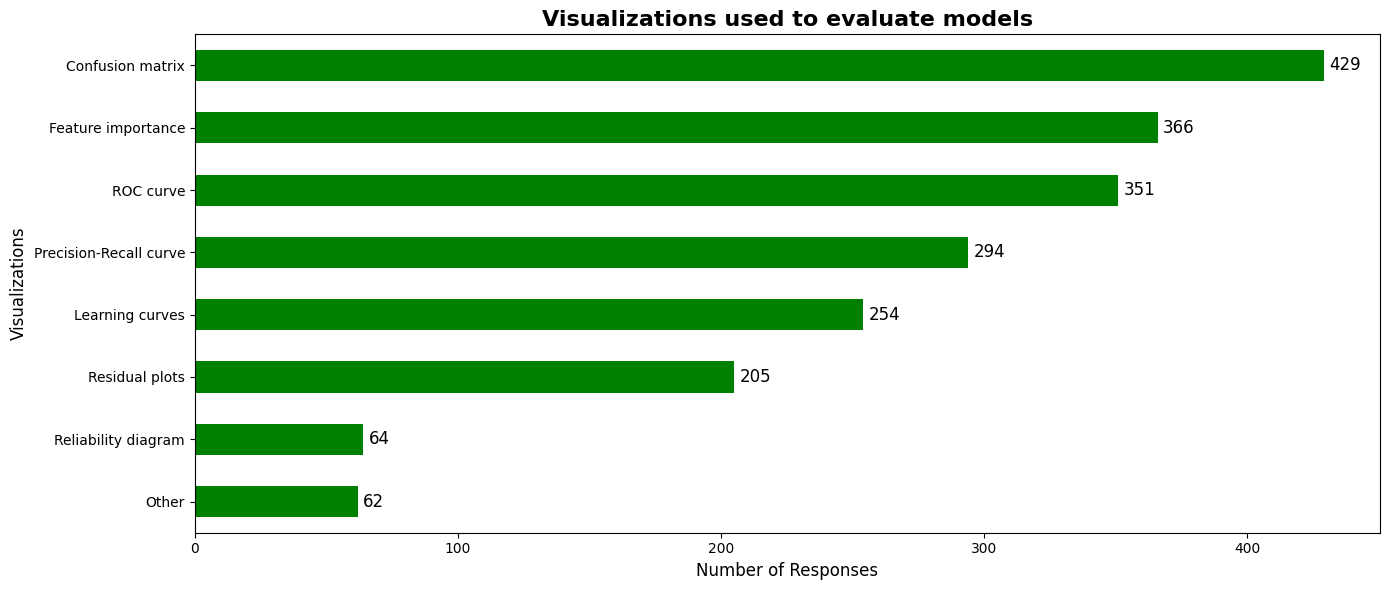

In [ ]:
plot_response_counts2(
    df=df,
    column_name='What visualizations do you use to evaluate your models? Select all that apply.',
    mapping_dict=mapping_dict,
    title='Visualizations used to evaluate models',
    color='green',
    y_ax_name='Visualizations'
)

# Question #7

---



In [ ]:
mapping_dict = {
    # cudf responses
    "cudf": "cudf",
    "cuDF كووديف": "cudf",
    # Dask DataFrame responses
    "Dask DataFrame": "Dask DataFrame",
    "Dask 数据框": "Dask DataFrame",
    "Dask DataFrame  اطر بيانات داسك": "Dask DataFrame",
    # DuckDB responses
    "DuckDB": "DuckDB",
    "DuckDB دك دي بي": "DuckDB",
    # Modin responses
    "Modin": "Modin",
    "Modin مودين": "Modin",
    # pandas responses
    "pandas": "pandas",
    "Pandas": "pandas",
    "pandas بنداز": "pandas",
    # Polars responses
    "Polars": "Polars",
    "Polars بولارز": "Polars",
    # Spark DataFrame responses
    "Spark DataFrame": "Spark DataFrame",
    "Spark 数据框": "Spark DataFrame",
    "Spark DataFrame اطر بيانات سبارك": "Spark DataFrame",
    # Other responses
    "Other": "Other",
    "Outro": "Other",
    "Otro": "Other",
    "其它": "Other",
    "Autre": "Other",
    "أخرى": "Other"
}

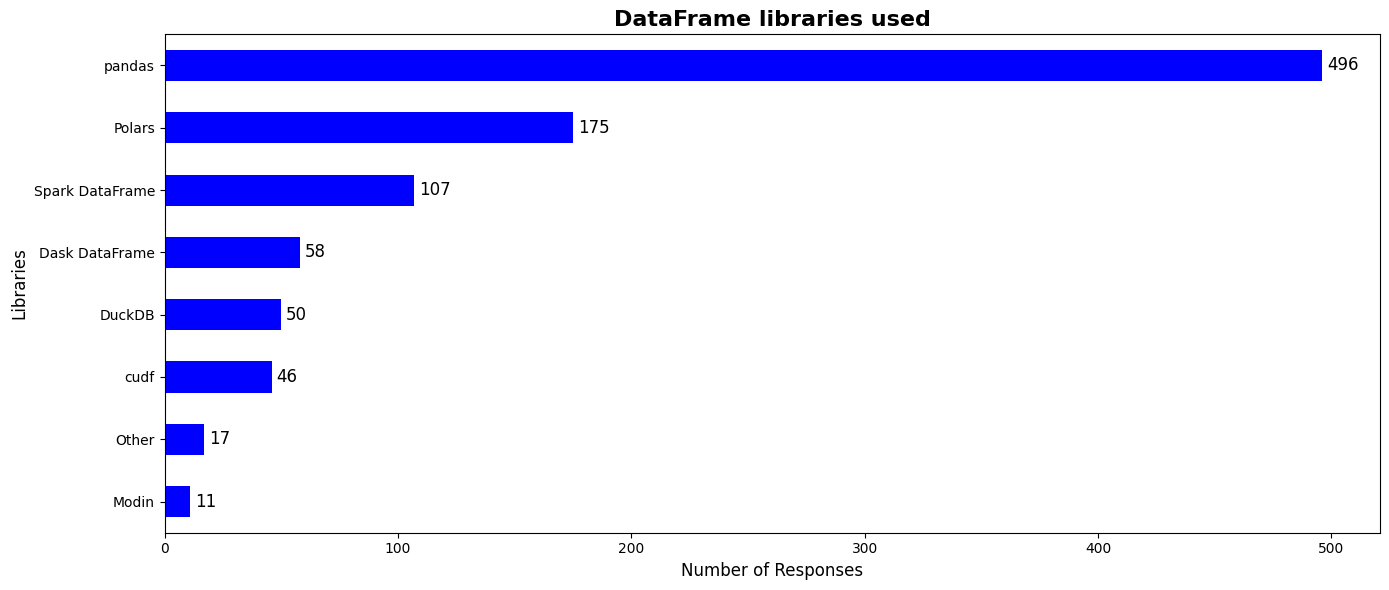

In [ ]:
plot_response_counts2(
    df=df,
    column_name='Which DataFrame libraries do you use? Select all that apply.',
    mapping_dict=mapping_dict,
    title='DataFrame libraries used',
    color='blue',
    y_ax_name='Libraries'
)

# Question #9

---

In [ ]:
mapping_dict = {
    # CatBoost responses
    "CatBoost": "CatBoost",
    "CatBoost كات بوست": "CatBoost",
    # Jax responses
    "Jax": "Jax",
    "JAX چاكس": "Jax",
    # Keras responses
    "Keras": "Keras",
    "Keras كيراس": "Keras",
    # LightGBM responses
    "LightGBM": "LightGBM",
    "LightGBM لايت جي بي ام": "LightGBM",
    # PyTorch responses
    "PyTorch": "PyTorch",
    "PyTorch باي تورش": "PyTorch",
    # Transformers responses
    "Transformers": "Transformers",
    "Transformers المحولات (ترانسفورمرز)": "Transformers",
    # XGBoost responses
    "XGBoost": "XGBoost",
    "XGBoost اكس جي بوست": "XGBoost",
    # Other responses
    "Other": "Other",
    "Outro": "Other",
    "Otro": "Other",
    "其它": "Other",
    "Autre": "Other",
    "أخرى": "Other"
}


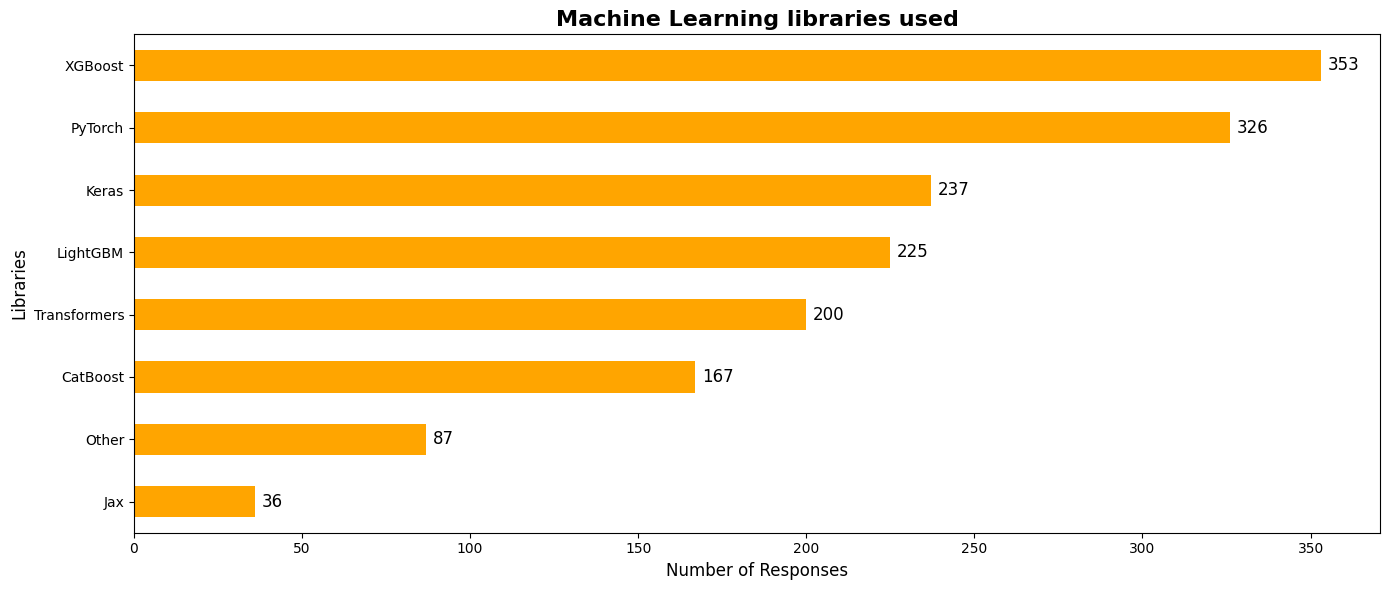

In [ ]:
plot_response_counts2(
    df=df,
    column_name='Which other Machine Learning libraries do you use? Select all that apply.',
    mapping_dict=mapping_dict,
    title='Machine Learning libraries used',
    color='orange',
    y_ax_name='Libraries'
)

# Question #10

---


In [ ]:
mapping_dict = {
    # LogisticRegression responses
    "LogisticRegression": "LogisticRegression",
    "RandomForestClassifier أو RandomForestRegressorLogisticRegression الانحدار اللوجستي": "LogisticRegression",
    # RandomForestClassifier or RandomForestRegressor responses
    "RandomForestClassifier or RandomForestRegressor": "RandomForestClassifier or RandomForestRegressor",
    "RandomForestClassifier ou RandomForestRegressor": "RandomForestClassifier or RandomForestRegressor",
    "RandomForestClassifier o RandomForestRegressor": "RandomForestClassifier or RandomForestRegressor",
    "RandomForestClassifier 或 RandomForestRegressor": "RandomForestClassifier or RandomForestRegressor",
    "مصنف الغابة العشوائية أو انحدار الغابة العشوائية": "RandomForestClassifier or RandomForestRegressor",
    # HistGradientBoostingRegressor or HistGradientBoostingClassifier responses
    "HistGradientBoostingRegressor or HistGradientBoostingClassifier": "HistGradientBoostingRegressor or HistGradientBoostingClassifier",
    "HistGradientBoostingRegressor ou HistGradientBoostingClassifier": "HistGradientBoostingRegressor or HistGradientBoostingClassifier",
    "HistGradientBoostingRegressor o HistGradientBoostingClassifier": "HistGradientBoostingRegressor or HistGradientBoostingClassifier",
    "HistGradientBoostingRegressor 或 HistGradientBoostingClassifier": "HistGradientBoostingRegressor or HistGradientBoostingClassifier",
    "HistGradientBoostingRegressorأو HistGradientBoostingClassifier  مصنف الانحدار المدعم بتحليل التردد أو شجرة الانحدار المدعمة بتحليل التردد</li>": "HistGradientBoostingRegressor or HistGradientBoostingClassifier",
    # Pipeline responses
    "Pipeline": "Pipeline",
    "Pipeline الوصلات \ خطوط الأنابيب": "Pipeline",
    # ColumnTransformer responses
    "ColumnTransformer": "ColumnTransformer",
    "ColumnTransforme محولات الاعمدة": "ColumnTransformer",
    # Other responses
    "Other": "Other",
    "Outro": "Other",
    "Otro": "Other",
    "其它": "Other",
    "Autre": "Other",
    "أخرى": "Other"
}


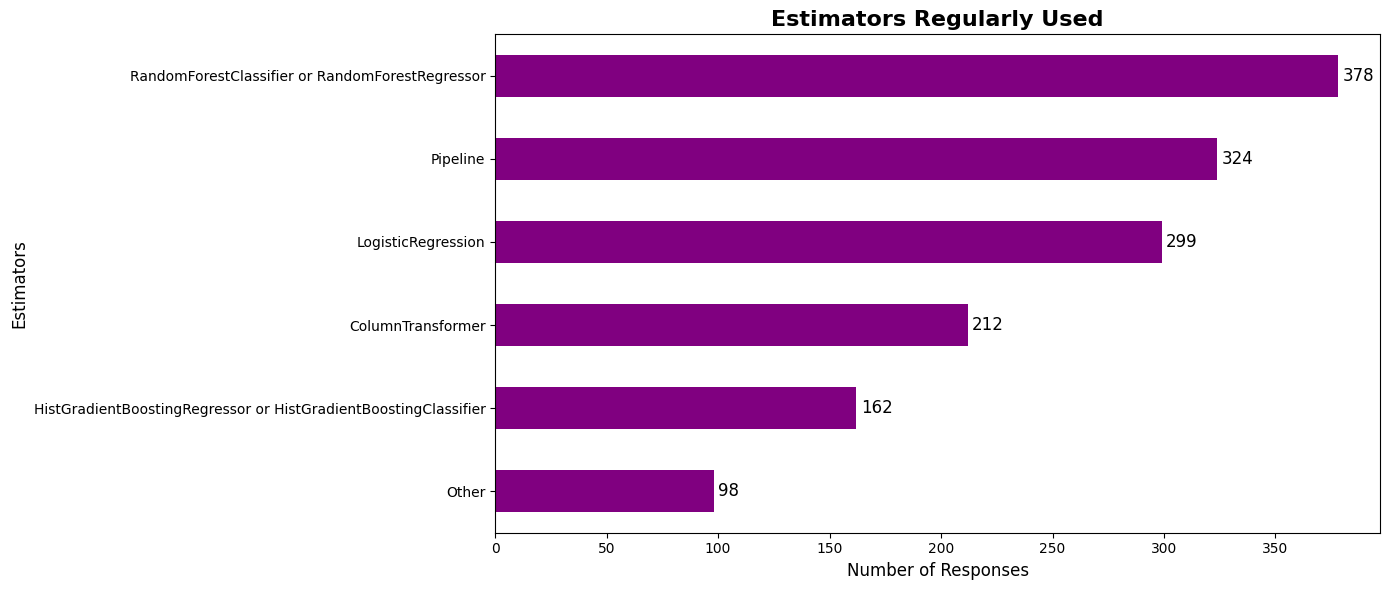

In [ ]:
plot_response_counts2(
    df=df,
    column_name='Which estimators do you regularly use? Select all that apply.',
    mapping_dict=mapping_dict,
    title='Estimators Regularly Used',
    color='purple',
    y_ax_name='Estimators'
)

# Question #11

---


In [ ]:

# Define the relevant question
question_column = "What ML features are important for your use case? Select all that apply."

# Check if the column exists in the dataset
if question_column in data.columns:
    # Count occurrences of each response
    response_counts = data[question_column].value_counts()

    # Sort responses in the desired order
    response_order = [
        "Calibration of probabilistic classifiers",
        "Calibration of regressors",
        "Uncertainty estimates for prediction",
        "Cost-sensitive learning",
        "Feature importances",
        "Sample weights",
        "Metadata routing",
        "Non-euclidean metrics"
    ]
    response_counts = response_counts.reindex(response_order, fill_value=0)

    # Plot the bar graph
    plt.figure(figsize=(12, 8))
    response_counts.plot(kind='bar', color='purple')

    # Add titles and labels
    plt.title("Responses to the Importance of Open Source ML/AI Frameworks", fontsize=14, fontweight="bold")
    plt.xlabel("Response", fontsize=12)
    plt.ylabel("Number of Respondents", fontsize=12)
    plt.xticks(rotation=45, ha='right')

    # Annotate the bars
    for i, count in enumerate(response_counts):
        plt.text(i, count + 0.5, str(count), ha='center', fontsize=10)

    # Show the plot
    plt.tight_layout()
    plt.show()
else:
    print(f"Column '{question_column}' not found in the dataset.")

NameError: name 'data' is not defined

# Question #12

---


<ipython-input-2-4e9caf66db91>:20: UserWarning: Glyph 21542 (\N{CJK UNIFIED IDEOGRAPH-5426}) missing from current font.
  plt.tight_layout()
<ipython-input-2-4e9caf66db91>:20: UserWarning: Glyph 26159 (\N{CJK UNIFIED IDEOGRAPH-662F}) missing from current font.
  plt.tight_layout()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 21542 (\N{CJK UNIFIED IDEOGRAPH-5426}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 26159 (\N{CJK UNIFIED IDEOGRAPH-662F}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


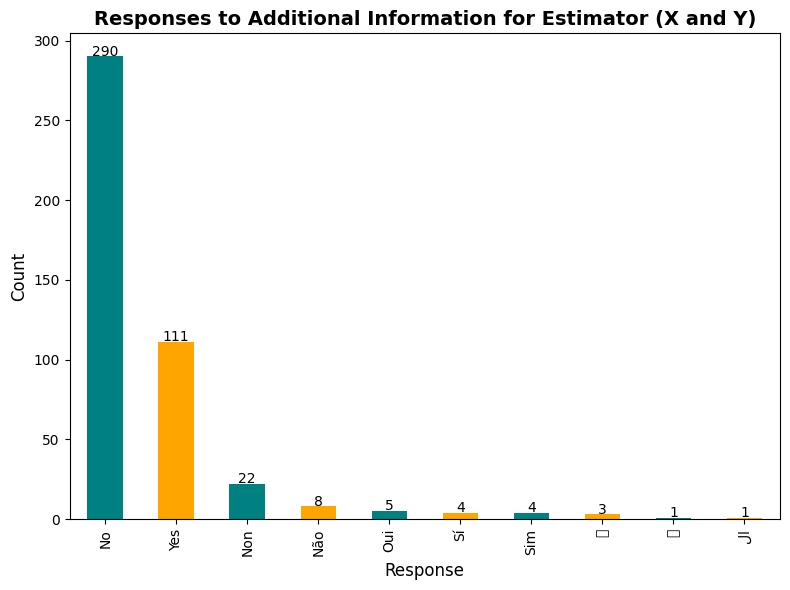

In [ ]:

# Extract responses to the question
question_column = "Is there additional information you want to pass to an estimator that is not X and Y?"
if question_column in data.columns:
    response_counts = data[question_column].value_counts()

    # Plot the bar graph
    plt.figure(figsize=(8, 6))
    response_counts.plot(kind='bar', color=['teal', 'orange'], )

    # Add titles and labels
    plt.title("Responses to Additional Information for Estimator (X and Y)", fontsize=14, fontweight='bold')
    plt.xlabel("Response", fontsize=12)
    plt.ylabel("Count", fontsize=12)

    # Annotate bars
    for i, count in enumerate(response_counts):
        plt.text(i, count + 0.5, str(count), ha='center', fontsize=10)

    # Show the plot
    plt.tight_layout()
    plt.show()
else:
    print(f"Column '{question_column}' not found in the dataset.")



# Question #15

---


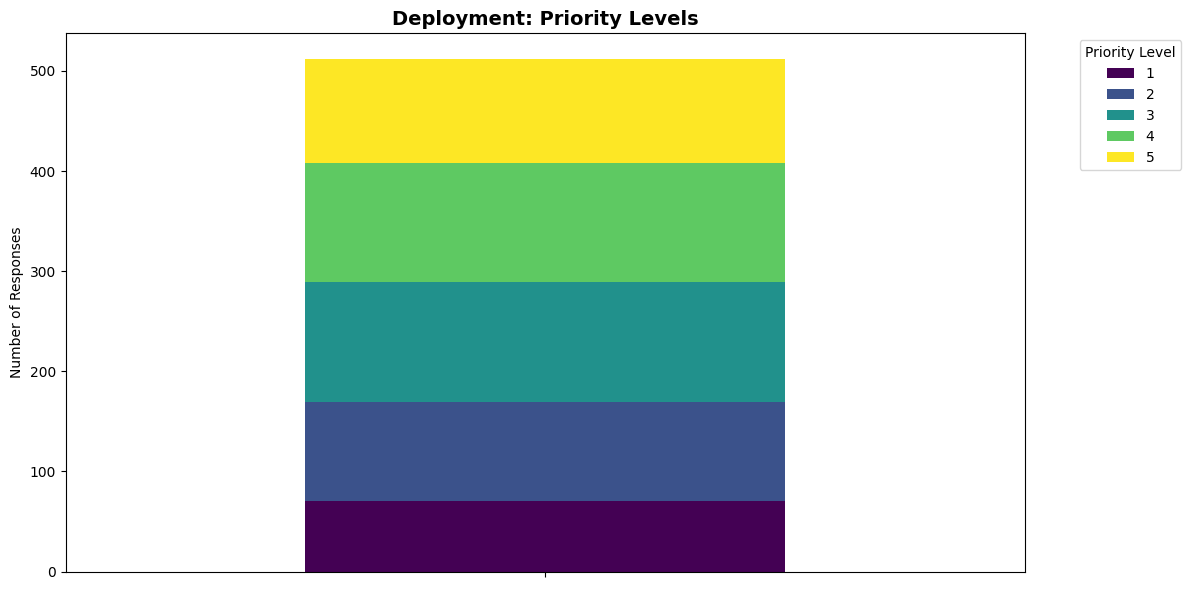

In [ ]:


#print(df.head())


# Identify the columns related to the question about priorities for Deployment
deployment_columns = [
    col for col in df.columns
    if "Considering your current machine learning projects, how critical would GPU capabilities within scikit-learn be?" in col
]

# print("Identified columns for Deployment:\n",deploy_columns)

# Filter relevant data
deploy_data = df[deployment_columns].dropna()

# Rename columns
renamed_deploy_columns = [
    ""
]
deploy_data.columns = renamed_deploy_columns

# Stacked bar chart
# Reindex with available priority levels (1 to 5)
priority_levels = [1, 2, 3, 4, 5]

# Prepare data for the stacked bar chart
stacked_bar_data = pd.DataFrame({
    category: deploy_data[category].value_counts().reindex(priority_levels, fill_value=0)
    for category in deploy_data.columns
}).T

# Print to verify processed data
#print("\nPrepared data for the stacked bar chart:")
#print(stacked_bar_data)

# Create the stacked bar chart
stacked_bar_data.plot(
    kind="bar", stacked=True, figsize=(12, 6), colormap="viridis", edgecolor="none"
)
plt.title("Deployment: Priority Levels", fontsize=14, fontweight='bold')
plt.xlabel("")
plt.ylabel("Number of Responses")
plt.legend(
    title="Priority Level", bbox_to_anchor=(1.05, 1), loc="upper left", fontsize=10
)
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

# Question #16

---


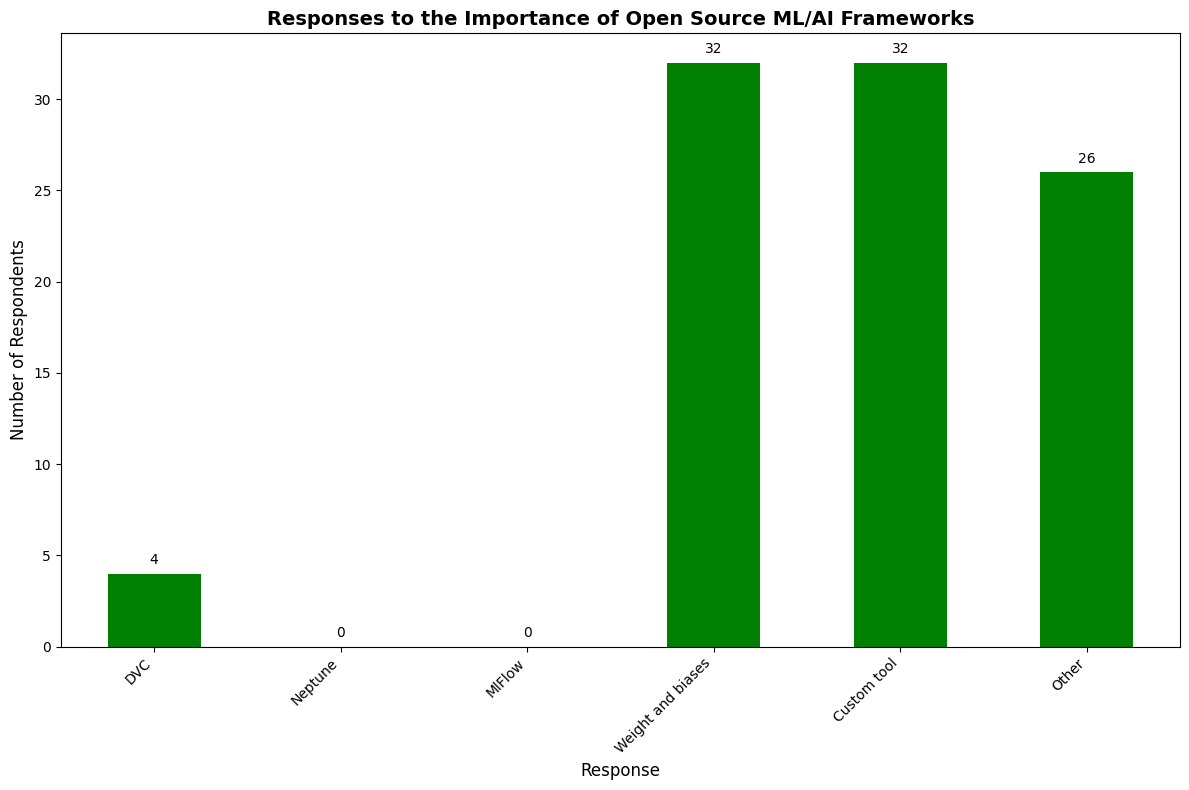

In [ ]:


# Define the relevant question
question_column = "For model registry and experiment tracking, do you use any of the following tools? Select all that apply."

# Check if the column exists in the dataset
if question_column in data.columns:
    # Count occurrences of each response
    response_counts = data[question_column].value_counts()

    # Sort responses in the desired order
    response_order = [
        "DVC",
        "Neptune",
        "MlFlow",
        "Weight and biases",
        "Custom tool",
        "Other"
    ]
    response_counts = response_counts.reindex(response_order, fill_value=0)

    # Plot the bar graph
    plt.figure(figsize=(12, 8))
    response_counts.plot(kind='bar', color='green')

    # Add titles and labels
    plt.title("Responses to the Importance of Open Source ML/AI Frameworks", fontsize=14, fontweight="bold")
    plt.xlabel("Response", fontsize=12)
    plt.ylabel("Number of Respondents", fontsize=12)
    plt.xticks(rotation=45, ha='right')

    # Annotate the bars
    for i, count in enumerate(response_counts):
        plt.text(i, count + 0.5, str(count), ha='center', fontsize=10)

    # Show the plot
    plt.tight_layout()
    plt.show()
else:
    print(f"Column '{question_column}' not found in the dataset.")

# Question #17

---


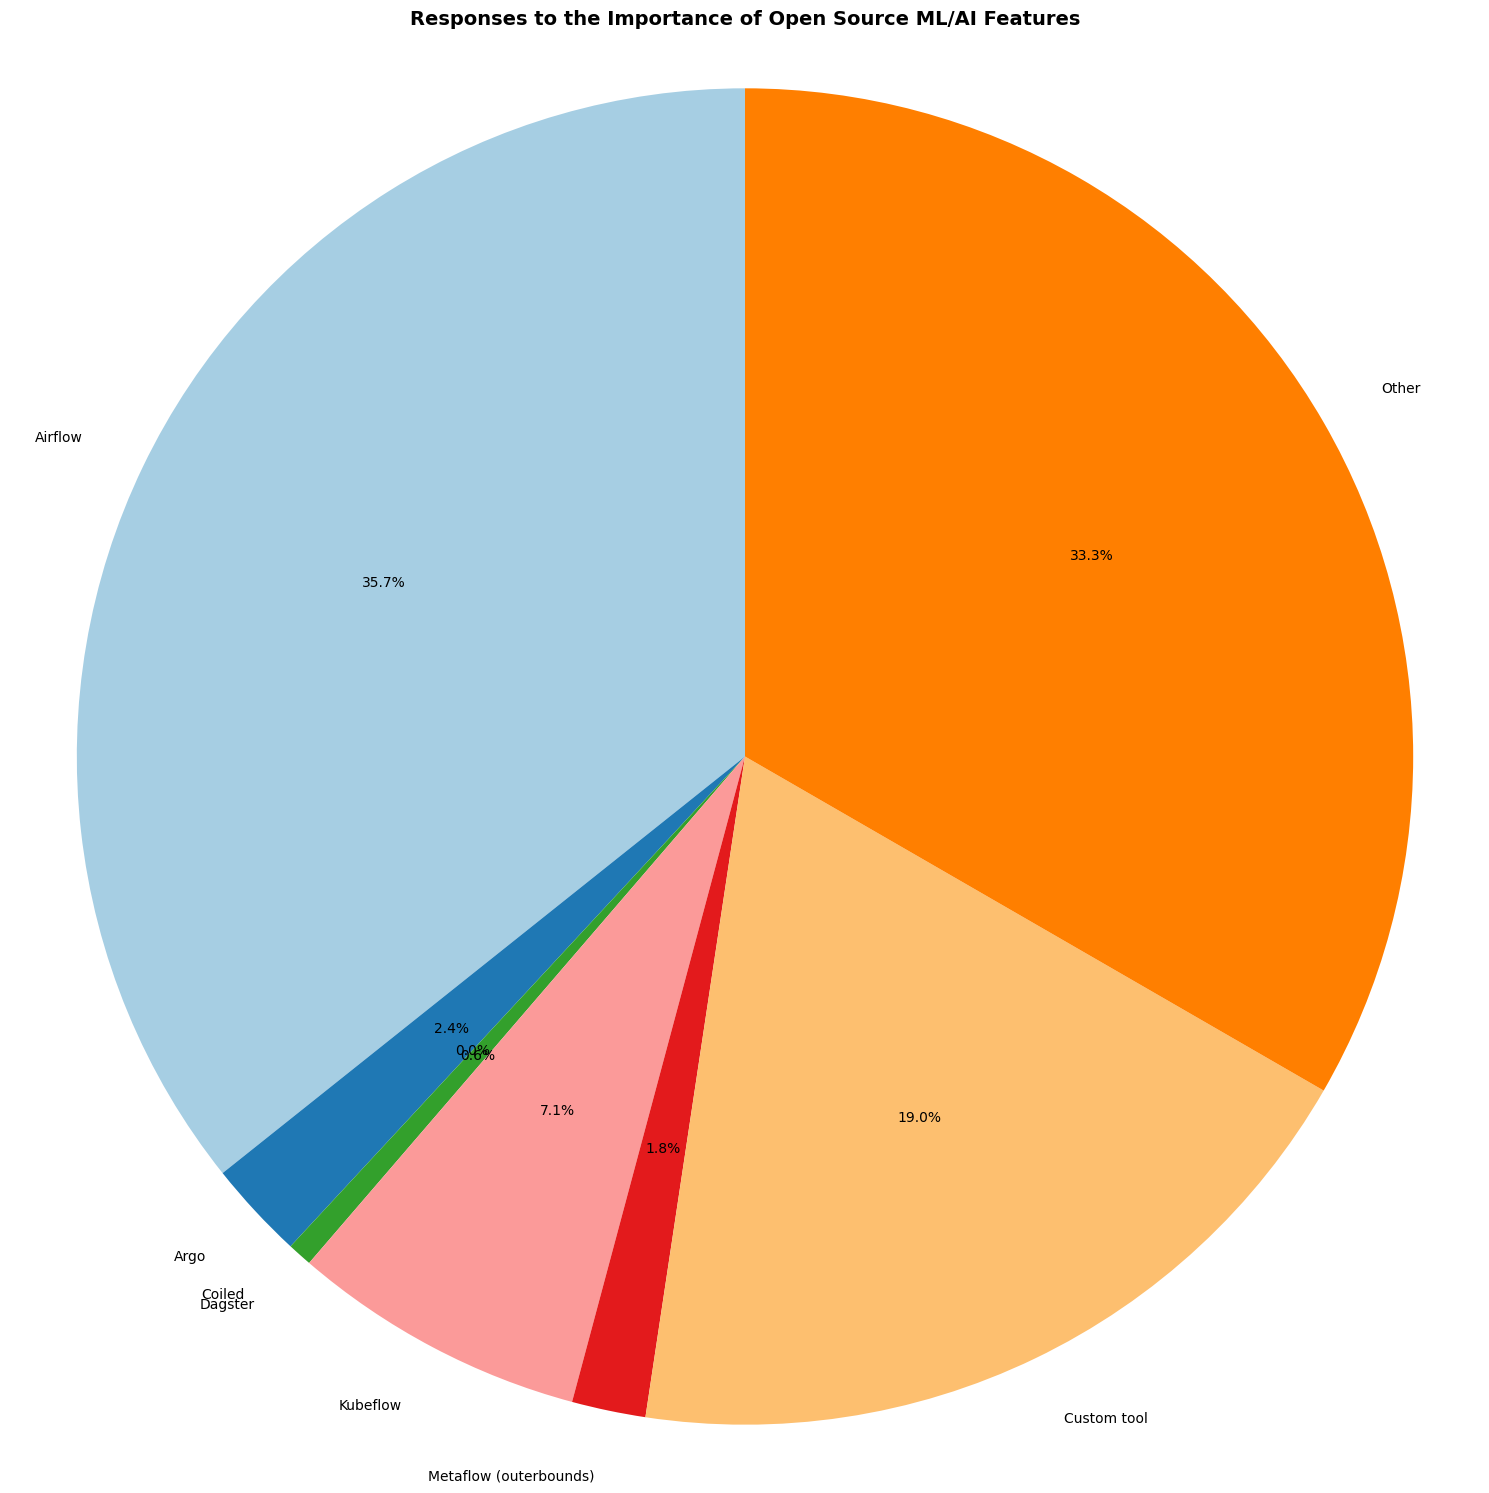

In [ ]:


# Define the relevant question
question_column = "For scheduling, do you use any of the following tools? Select all that apply."

# Check if the column exists in the dataset
if question_column in data.columns:
    # Count occurrences of each response
    response_counts = data[question_column].value_counts()

    # Sort responses in the desired order
    response_order = [
        "Airflow",
        "Argo",
        "Coiled",
        "Dagster",
        "Kubeflow",
        "Metaflow (outerbounds)",
        "Custom tool",
        "Other"
    ]
    response_counts = response_counts.reindex(response_order, fill_value=0)

    # Plot the pie chart
    plt.figure(figsize=(15, 15))
    plt.pie(response_counts, labels=response_counts.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)

    # Add title
    plt.title("Responses to the Importance of Open Source ML/AI Features", fontsize=14, fontweight="bold")

    # Show the plot
    plt.axis('equal')  # Equal aspect ratio ensures that pie chart is drawn as a circle.
    plt.tight_layout()
    plt.show()

else:
    print(f"Column '{question_column}' not found in the dataset.")


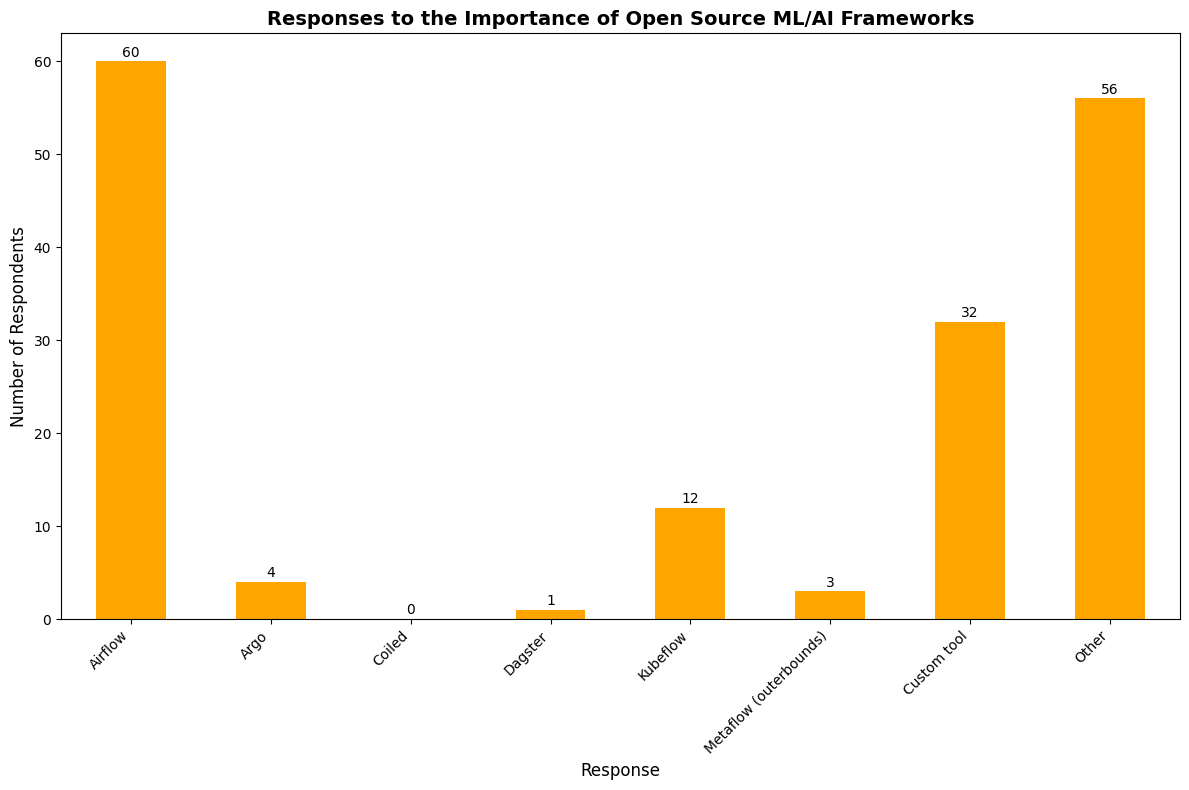

In [ ]:


# Define the relevant question
question_column = "For scheduling, do you use any of the following tools? Select all that apply."

# Check if the column exists in the dataset
if question_column in data.columns:
    # Count occurrences of each response
    response_counts = data[question_column].value_counts()

    # Sort responses in the desired order
    response_order = [
        "Airflow",
        "Argo",
        "Coiled",
        "Dagster",
        "Kubeflow",
        "Metaflow (outerbounds)",
        "Custom tool",
        "Other"
    ]
    response_counts = response_counts.reindex(response_order, fill_value=0)

    # Plot the bar graph
    plt.figure(figsize=(12, 8))
    response_counts.plot(kind='bar', color='orange')

    # Add titles and labels
    plt.title("Responses to the Importance of Open Source ML/AI Frameworks", fontsize=14, fontweight="bold")
    plt.xlabel("Response", fontsize=12)
    plt.ylabel("Number of Respondents", fontsize=12)
    plt.xticks(rotation=45, ha='right')

    # Annotate the bars
    for i, count in enumerate(response_counts):
        plt.text(i, count + 0.5, str(count), ha='center', fontsize=10)

    # Show the plot
    plt.tight_layout()
    plt.show()
else:
    print(f"Column '{question_column}' not found in the dataset.")

# Question #18

---


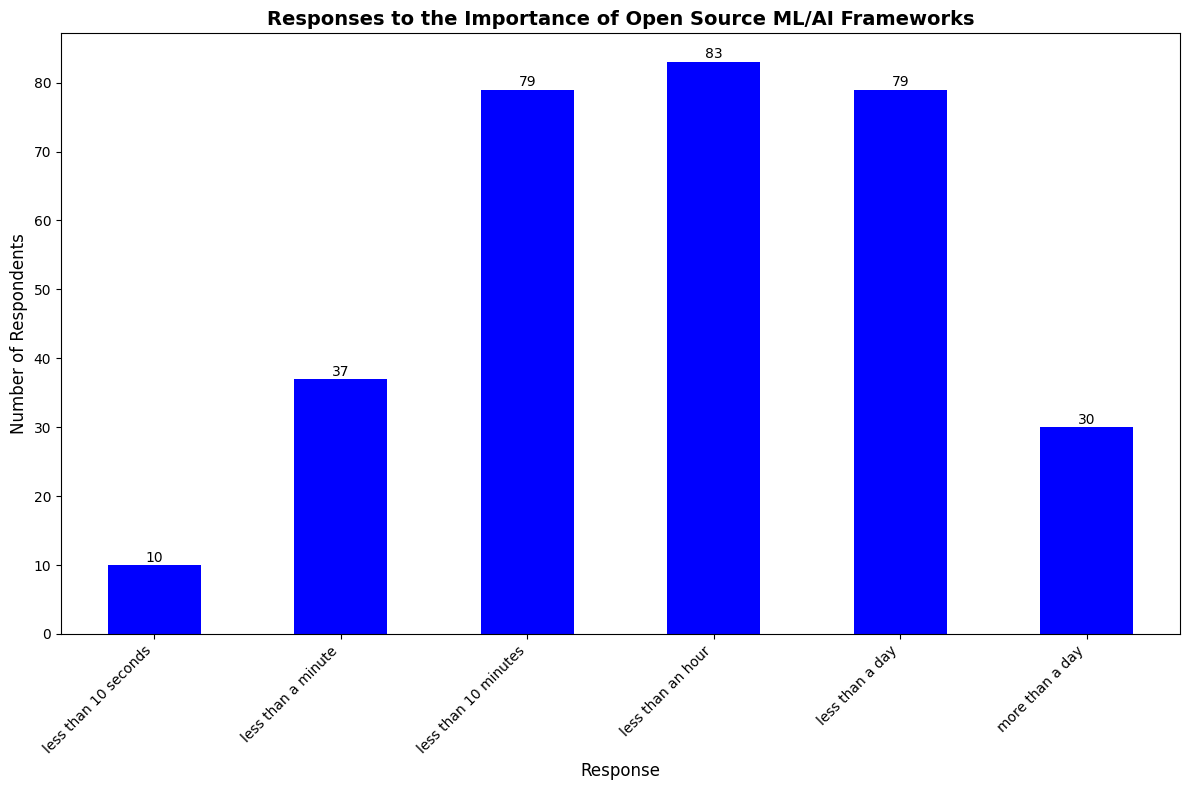

In [ ]:


# Define the relevant question
question_column = "How long does a typical model training take in your ML projects?"

# Check if the column exists in the dataset
if question_column in data.columns:
    # Count occurrences of each response
    response_counts = data[question_column].value_counts()

    # Sort responses in the desired order
    response_order = [
        "less than 10 seconds",
        "less than a minute",
        "less than 10 minutes",
        "less than an hour",
        "less than a day",
        "more than a day",
    ]
    response_counts = response_counts.reindex(response_order, fill_value=0)

    # Plot the bar graph
    plt.figure(figsize=(12, 8))
    response_counts.plot(kind='bar', color='blue')

    # Add titles and labels
    plt.title("Responses to the Importance of Open Source ML/AI Frameworks", fontsize=14, fontweight="bold")
    plt.xlabel("Response", fontsize=12)
    plt.ylabel("Number of Respondents", fontsize=12)
    plt.xticks(rotation=45, ha='right')

    # Annotate the bars
    for i, count in enumerate(response_counts):
        plt.text(i, count + 0.5, str(count), ha='center', fontsize=10)

    # Show the plot
    plt.tight_layout()
    plt.show()
else:
    print(f"Column '{question_column}' not found in the dataset.")


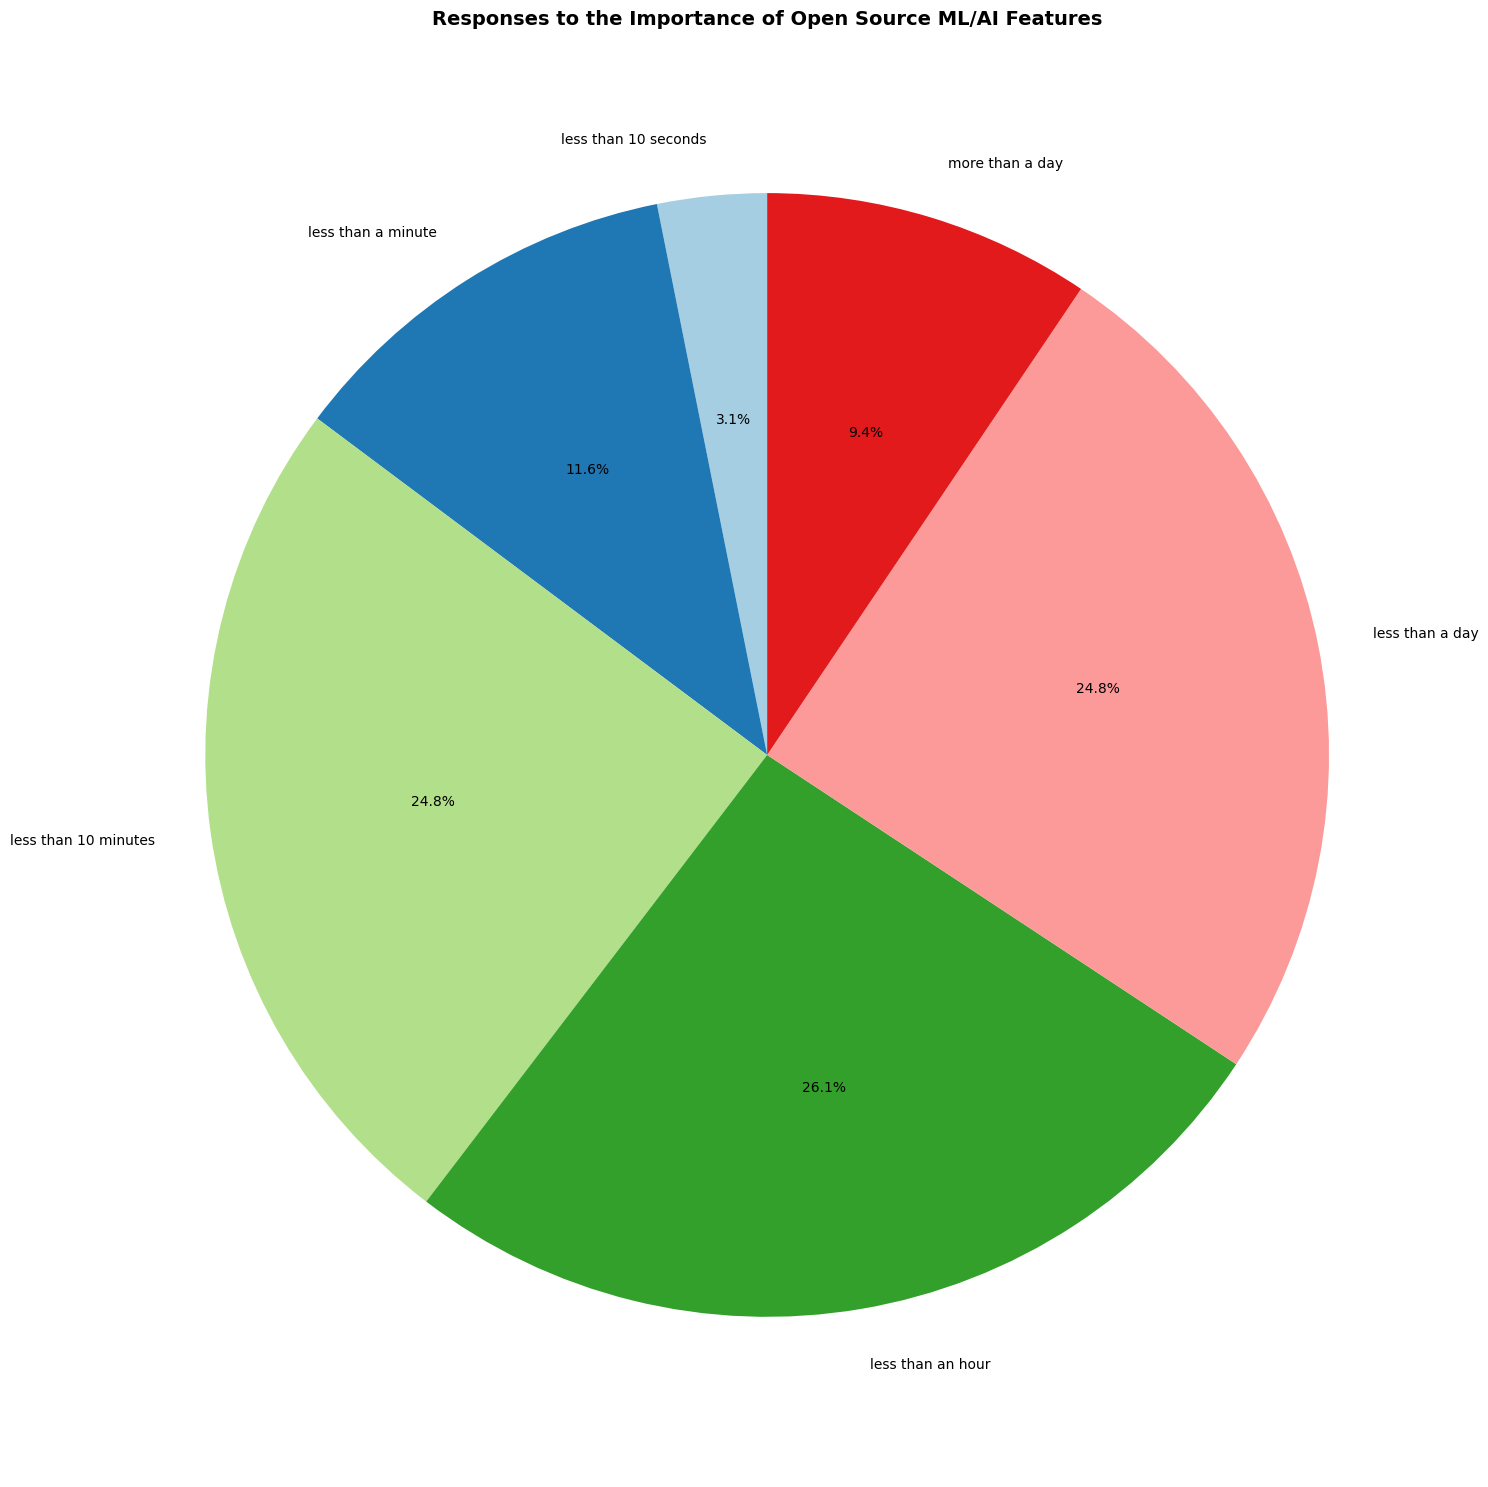

In [ ]:

# Define the relevant question
question_column = "How long does a typical model training take in your ML projects?"

# Check if the column exists in the dataset
if question_column in data.columns:
    # Count occurrences of each response
    response_counts = data[question_column].value_counts()

    # Sort responses in the desired order
    response_order = [
        "less than 10 seconds",
        "less than a minute",
        "less than 10 minutes",
        "less than an hour",
        "less than a day",
        "more than a day",
    ]
    response_counts = response_counts.reindex(response_order, fill_value=0)

    # Plot the pie chart
    plt.figure(figsize=(15, 15))
    plt.pie(response_counts, labels=response_counts.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)

    # Add title
    plt.title("Responses to the Importance of Open Source ML/AI Features", fontsize=14, fontweight="bold")

    # Show the plot
    plt.axis('equal')  # Equal aspect ratio ensures that pie chart is drawn as a circle.
    plt.tight_layout()
    plt.show()

else:
    print(f"Column '{question_column}' not found in the dataset.")


# Question #19

---


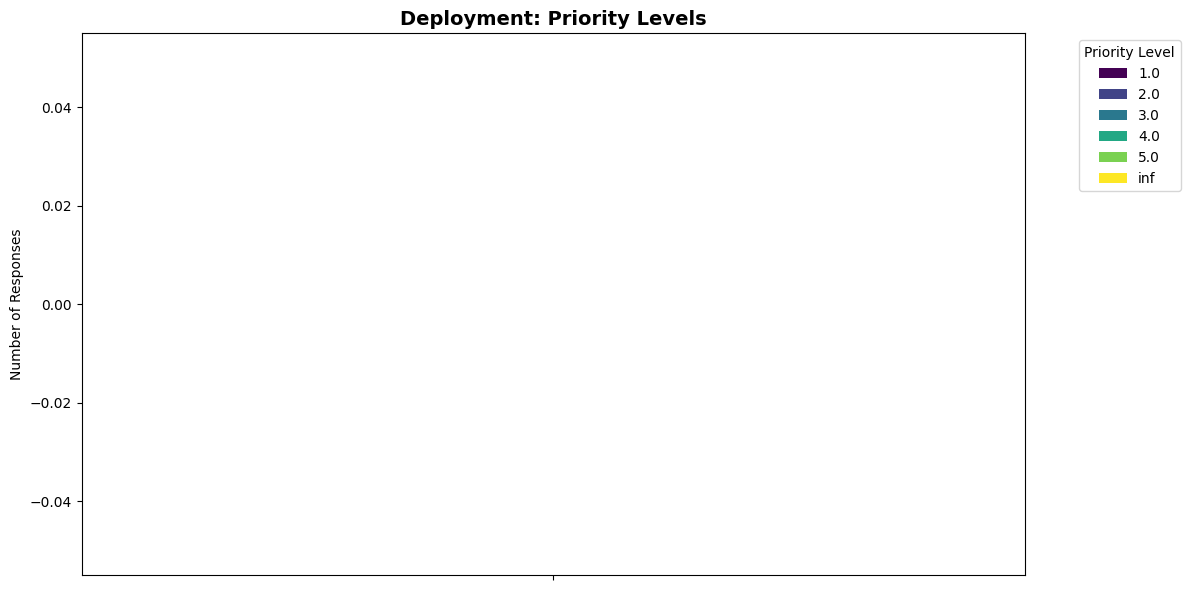

In [ ]:


#print(df.head())

# Identify the columns related to the question about priorities for Deployed Models
deployed_models_columns = [
    col for col in df.columns
    if "How many deployed models are you (and your team) currently maintaining?" in col
]

# print("Identified columns for Deployed Models:\n",deploy_columns)

# Filter relevant data
deployed_data = df[deployed_models_columns].dropna()

# Rename columns
renamed_deployed_columns = [
    ""
]
deployed_data.columns = renamed_deployed_columns

# Stacked bar chart
# Reindex with available priority levels (1 to 5 and more than 5)
priority_levels = [1, 2, 3, 4, 5, float('inf')]  # [1, 2, 3, 4, 5, >5]


# Prepare data for the stacked bar chart
stacked_bar_data = pd.DataFrame({
    category: deployed_data[category].value_counts().reindex(priority_levels, fill_value=0)
    for category in deployed_data.columns
}).T

# Print to verify processed data
#print("\nPrepared data for the stacked bar chart:")
#print(stacked_bar_data)

# Create the stacked bar chart
stacked_bar_data.plot(
    kind="bar", stacked=True, figsize=(12, 6), colormap="viridis", edgecolor="none"
)
plt.title("Deployment: Priority Levels", fontsize=14, fontweight='bold')
plt.xlabel("")
plt.ylabel("Number of Responses")
plt.legend(
    title="Priority Level", bbox_to_anchor=(1.05, 1), loc="upper left", fontsize=10
)
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

# Question #20

---


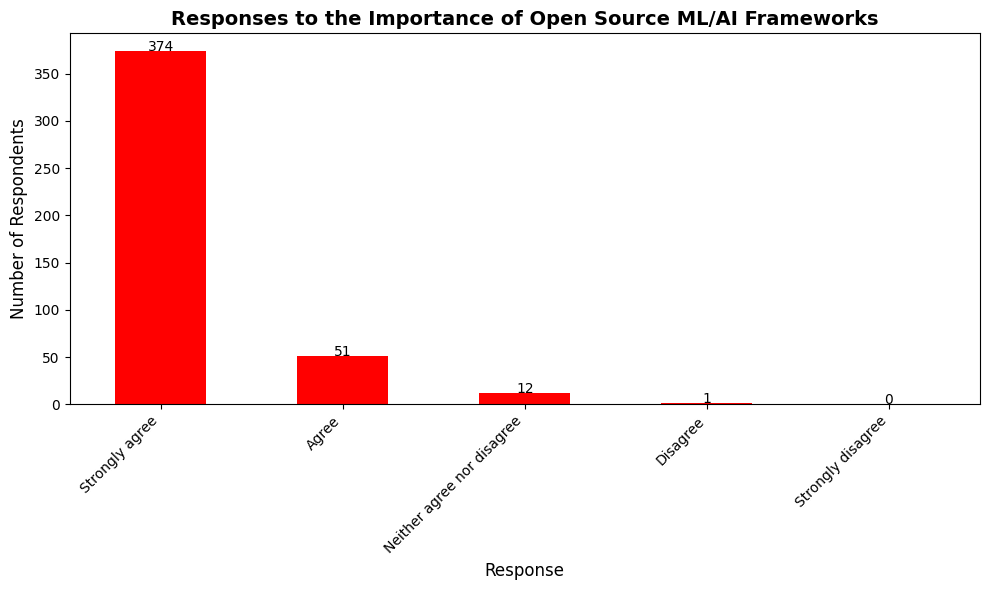

In [ ]:

# Define the relevant question
question_column = "To what extent do you agree with the following statement?\nOpen source ML & AI frameworks and libraries are crucial for ensuring transparency and the reproducibility of AI research and development."

# Check if the column exists in the dataset
if question_column in data.columns:
    # Count occurrences of each response
    response_counts = data[question_column].value_counts()

    # Sort responses in the desired order
    response_order = [
        "Strongly agree",
        "Agree",
        "Neither agree nor disagree",
        "Disagree",
        "Strongly disagree"
    ]
    response_counts = response_counts.reindex(response_order, fill_value=0)

    # Plot the bar graph
    plt.figure(figsize=(10, 6))
    response_counts.plot(kind='bar', color='red')

    # Add titles and labels
    plt.title("Responses to the Importance of Open Source ML/AI Frameworks", fontsize=14, fontweight="bold")
    plt.xlabel("Response", fontsize=12)
    plt.ylabel("Number of Respondents", fontsize=12)
    plt.xticks(rotation=45, ha='right')

    # Annotate the bars
    for i, count in enumerate(response_counts):
        plt.text(i, count + 0.5, str(count), ha='center', fontsize=10)

    # Show the plot
    plt.tight_layout()
    plt.show()
else:
    print(f"Column '{question_column}' not found in the dataset.")
